#  데이터 전처리

## 1. 주가를 수익률로 변환하기

1) 단순 수익률 :  $R_t = \frac{P_t-P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}}-1$

2) 로그 수익률 : $r_t = log\left(\frac{P_t}{P_{t-1}}\right) = log(P_t) - log(P_{t-1})$

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

- 야후 파이낸스의 테슬라의 주가 데이터를 불러와서 조정정가만 남긴 후 조정 정가에 따라 단순 수익률과 로그 수익률을 계산해보자

In [5]:
df_tsla = yf.download('TSLA',start='2021-01-01',end='2021-12-31',progress=False)

In [6]:
df_tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49649900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000


In [7]:
df = df_tsla.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'},inplace=True)

In [8]:
df['simple_return_rate'] = df.adj_close.pct_change()
df['log_return_rate'] = np.log(df.adj_close/df.adj_close.shift(1))

In [9]:
df

,adj_close,simple_return_rate,log_return_rate
Date,,,
2020-12-31,705.669983,NaN,NaN
2021-01-04,729.770020,0.034152,0.033582
2021-01-05,735.109985,0.007317,0.007291
2021-01-06,755.979980,0.028390,0.027995
2021-01-07,816.039978,0.079447,0.076448
...,...,...,...
2021-12-23,1067.000000,0.057619,0.056020
2021-12-27,1093.939941,0.025248,0.024935
2021-12-28,1088.469971,-0.005000,-0.005013


- 위의 값에 100씩을 곱해주면 우리가 알고 있는 % 수익률을 볼 수 있다.

In [10]:
df['simple_return_rate(%)'] = df['simple_return_rate']*100
df['log_return_rate(%)'] = df['log_return_rate']*100

In [11]:
df

,adj_close,simple_return_rate,log_return_rate,simple_return_rate(%),log_return_rate(%)
Date,,,,,
2020-12-31,705.669983,NaN,NaN,NaN,NaN
2021-01-04,729.770020,0.034152,0.033582,3.415199,3.358176
2021-01-05,735.109985,0.007317,0.007291,0.731733,0.729069
2021-01-06,755.979980,0.028390,0.027995,2.839030,2.799477
2021-01-07,816.039978,0.079447,0.076448,7.944655,7.644845
...,...,...,...,...,...
2021-12-23,1067.000000,0.057619,0.056020,5.761893,5.602008
2021-12-27,1093.939941,0.025248,0.024935,2.524830,2.493483
2021-12-28,1088.469971,-0.005000,-0.005013,-0.500025,-0.501279


- 소비자 물가지수 데이터를 불러와 지수의 변동률의 계산하면 인플레이션 데이터를 만들 수 있다. 그 후 아래의 공식을 사용하면 월별 인플레이션 조정 수익률을 고려할 수 있다.

3) 인플레이션 조정 수익률 : $R_t^r = \frac{1+R_t}{1+\pi_t}-1$ where $R_t : t에서의 단순 수익률, \pi_t: 인플레이션율$

In [12]:
import pandas as pd
import quandl

quandl_key = 'AR5J41pEzA-6zZvVBYy9'
quandl.ApiConfig.api_key = quandl_key

In [13]:
df_date = pd.DataFrame(index=pd.date_range(start='2020-12-31',end='2021-12-31'))

In [14]:
dff = df_date.join(df[['adj_close']],how='left').fillna(method='ffill').asfreq('M')

In [15]:
df_cpi = quandl.get(dataset = 'RATEINF/CPI_USA',start_date='2020-12-31',end_time='2021-12-31')
df_cpi.rename(columns={'Value':'cpi'},inplace=True)
df_cpi

,cpi
Date,
2020-12-31,260.474
2021-01-31,261.582
2021-02-28,263.014
2021-03-31,264.877
2021-04-30,267.054
2021-05-31,269.195
2021-06-30,271.696
2021-07-31,273.003
2021-08-31,273.567


In [16]:
df_inf = dff.join(df_cpi,how='left')
df_inf

,adj_close,cpi
2020-12-31,705.669983,260.474
2021-01-31,793.530029,261.582
2021-02-28,675.500000,263.014
2021-03-31,667.929993,264.877
2021-04-30,709.440002,267.054
2021-05-31,625.219971,269.195
2021-06-30,679.700012,271.696
2021-07-31,687.200012,273.003
2021-08-31,735.719971,273.567
2021-09-30,775.479980,274.310


In [17]:
df_inf['simple_return_rate'] = df_inf.adj_close.pct_change()
df_inf['inflation_rate'] = df_inf.cpi.pct_change()

In [18]:
df_inf['adj_simple_rate'] = (df_inf.simple_return_rate+1)/(df_inf.inflation_rate+1) - 1
df_inf

,adj_close,cpi,simple_return_rate,inflation_rate,adj_simple_rate
2020-12-31,705.669983,260.474,NaN,NaN,NaN
2021-01-31,793.530029,261.582,0.124506,0.004254,0.119743
2021-02-28,675.500000,263.014,-0.148740,0.005474,-0.153375
2021-03-31,667.929993,264.877,-0.011207,0.007083,-0.018161
2021-04-30,709.440002,267.054,0.062147,0.008219,0.053489
2021-05-31,625.219971,269.195,-0.118713,0.008017,-0.125723
2021-06-30,679.700012,271.696,0.087137,0.009291,0.077130
2021-07-31,687.200012,273.003,0.011034,0.004811,0.006194
2021-08-31,735.719971,273.567,0.070605,0.002066,0.068398
2021-09-30,775.479980,274.310,0.054042,0.002716,0.051187


## 2. 빈도 변경

1) 로그 수익률에 시간 주기 개수를 곱하거나 나눔

2) 실현 변동성에 시간 주기 개수의 제곱근을 곱하거나 나눔

- 실현 변동성 $RV = \sqrt{\displaystyle\sum_{t=1}^Tr_t^2}$

In [20]:
dff

,adj_close
2020-12-31,705.669983
2021-01-31,793.530029
2021-02-28,675.500000
2021-03-31,667.929993
2021-04-30,709.440002
2021-05-31,625.219971
2021-06-30,679.700012
2021-07-31,687.200012
2021-08-31,735.719971
2021-09-30,775.479980


In [3]:
def volatility(x):
    return np.sqrt(np.sum(x**2))

In [34]:
df2 = df['log_return_rate'].to_frame()
df2

,log_return_rate
Date,
2020-12-31,NaN
2021-01-04,0.033582
2021-01-05,0.007291
2021-01-06,0.027995
2021-01-07,0.076448
...,...
2021-12-23,0.056020
2021-12-27,0.024935
2021-12-28,-0.005013


In [36]:
df2.groupby(pd.Grouper(freq='M'))

In [41]:
df_v = df2.groupby(pd.Grouper(freq='M')).apply(volatility) # 월별로 일별 변동성 구함
df_v.rename(columns={'log_return_rate':'rv'},inplace=True)

In [42]:
df_v = df_v*np.sqrt(12) # 월별 값에서 연환산

In [48]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize']=[16,9]
plt.rcParams['figure.dpi']=300
warnings.simplefilter(action='ignore',category=FutureWarning)

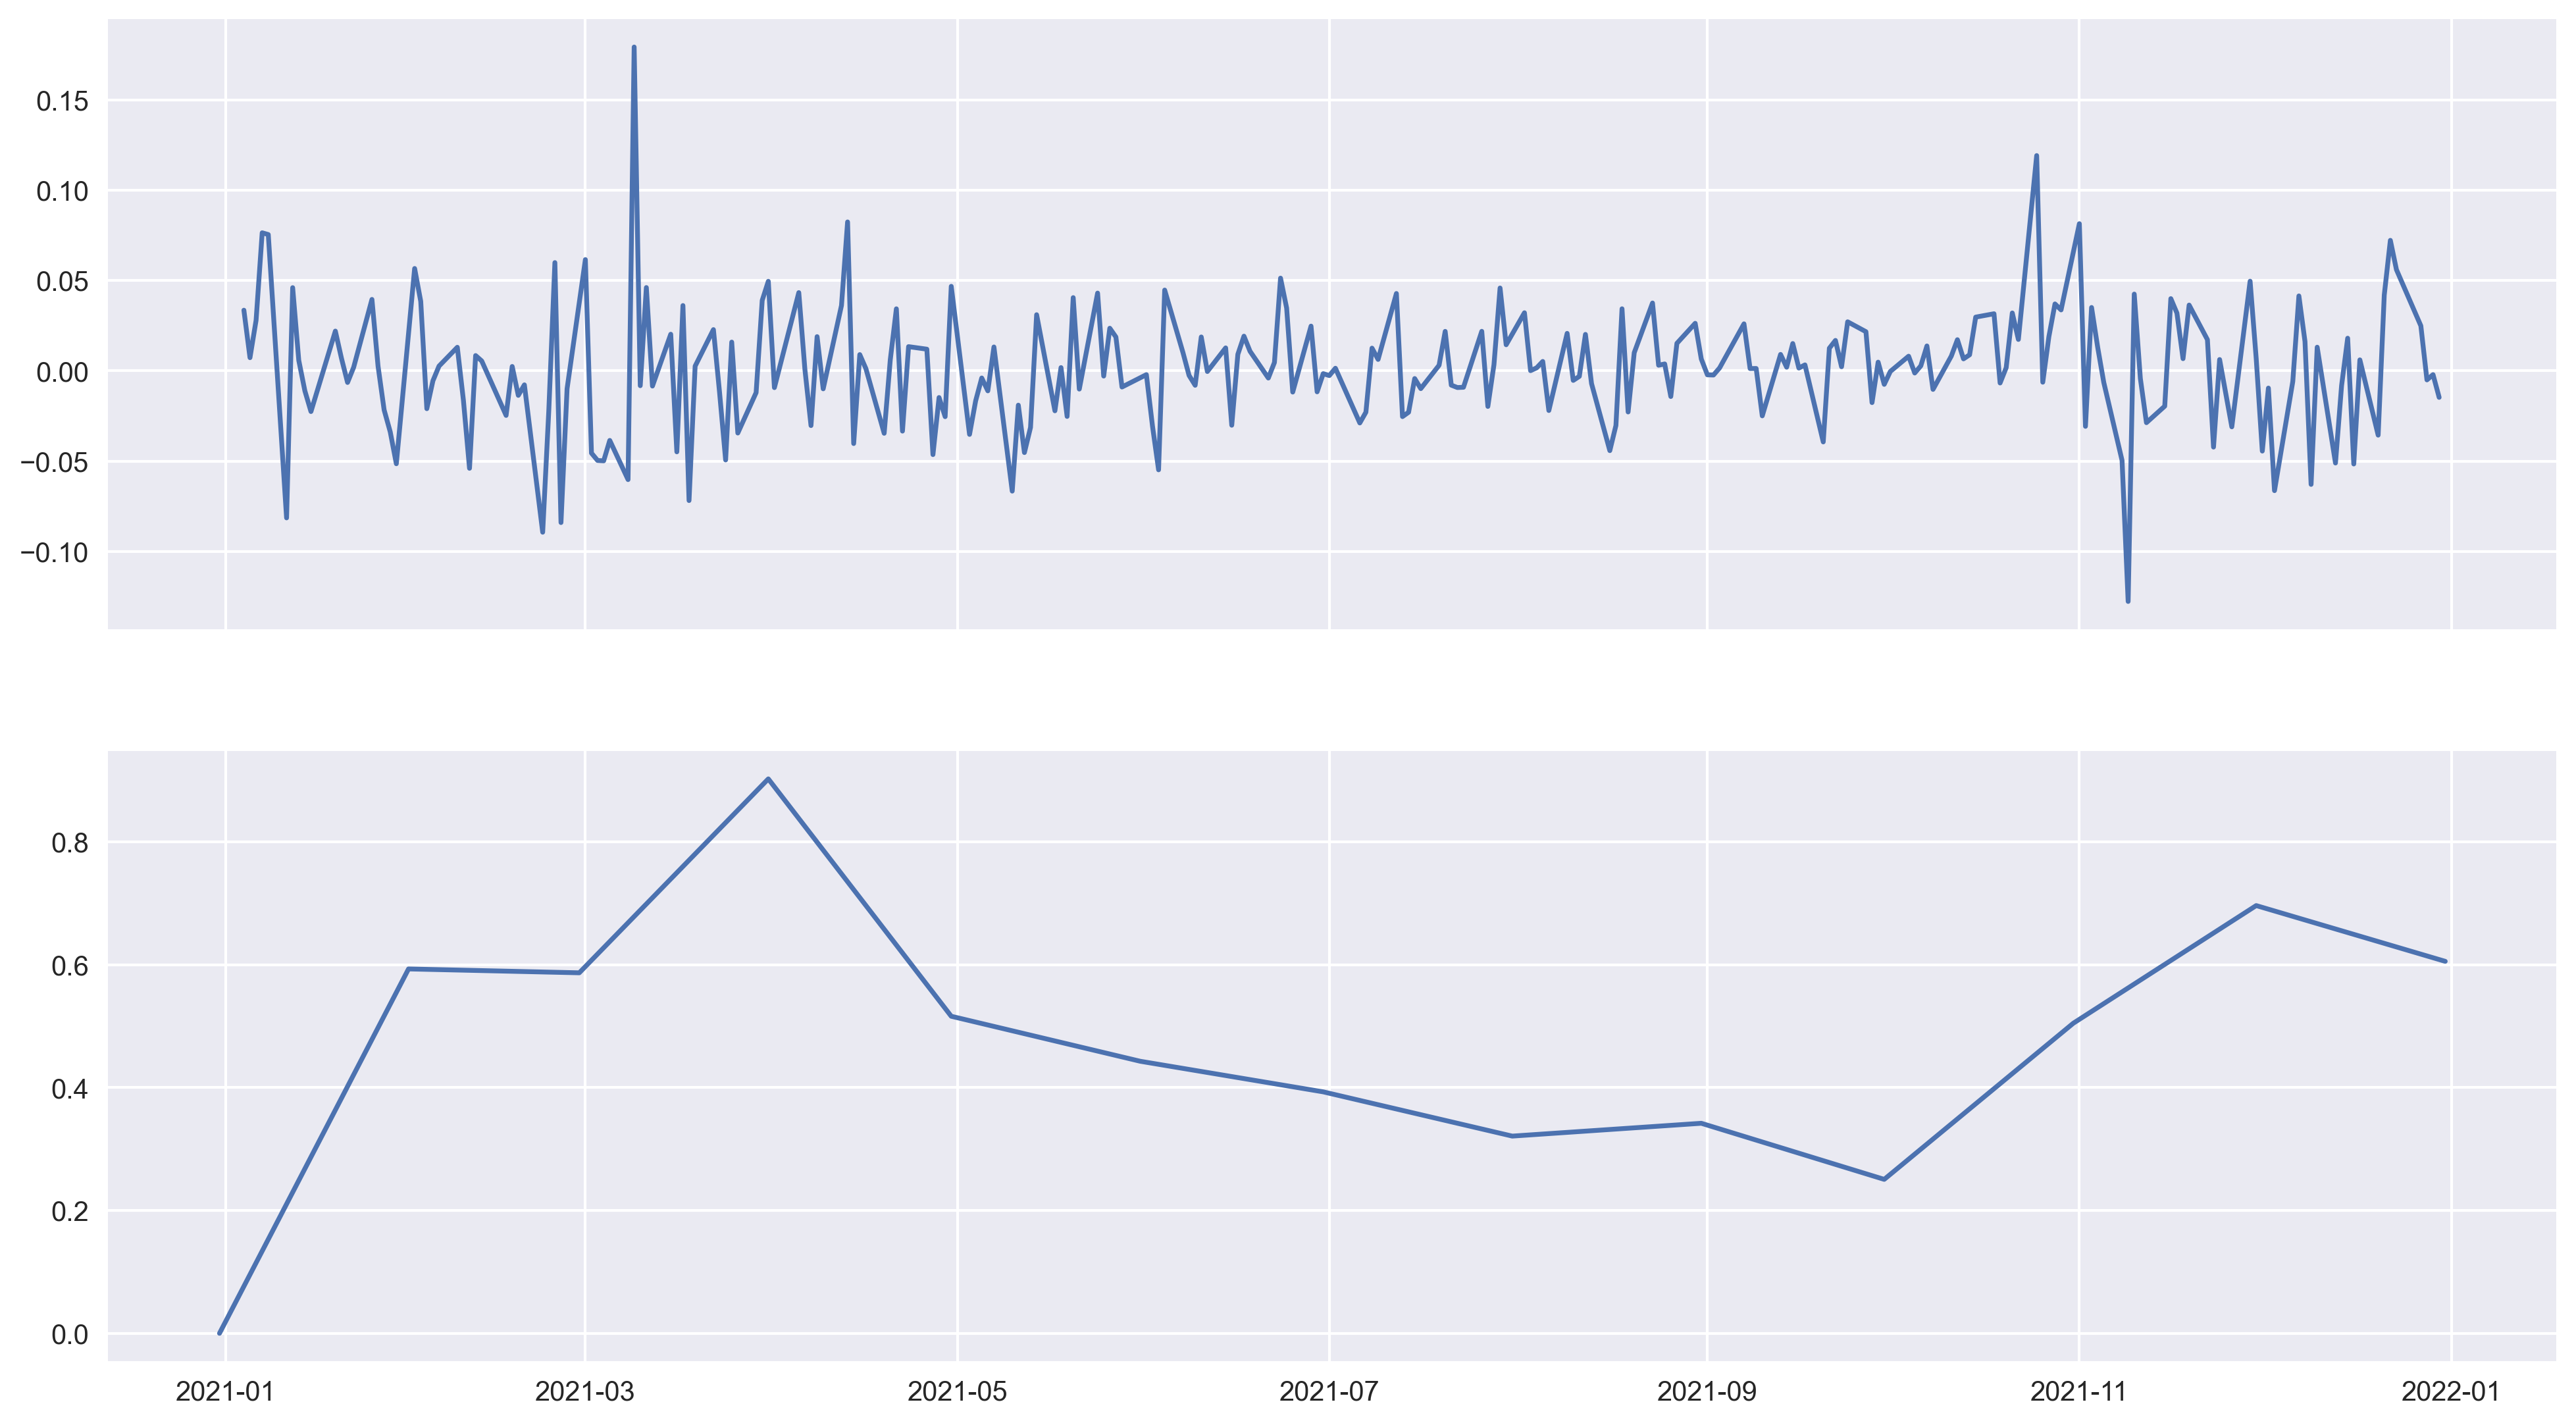

In [49]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df.log_return_rate)
ax[1].plot(df_v.rv)